In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from scipy import fftpack
from scipy import spatial

### Import dataset and describe

In [4]:
df_1 = pd.read_csv(r"D:\Documents\Actividades Gina\giroscopio\multiple\sara\imu_sara.csv", sep=",")
df_2 = pd.read_csv(r"D:\Documents\Actividades Gina\giroscopio\multiple\lolo\imu_lolo.csv", sep=",")
df_3 = pd.read_csv(r"D:\Documents\Actividades Gina\giroscopio\multiple\silvana\imu_silvana.csv", sep=",")

In [5]:
df_1

,section id,recording id,timestamp [ns],gyro x [deg/s],gyro y [deg/s],gyro z [deg/s],acceleration x [g],acceleration y [g],acceleration z [g],roll [deg],pitch [deg],yaw [deg],quaternion w,quaternion x,quaternion y,quaternion z
0,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220723716322759,7.379532,2.332687,-3.221512,-0.050781,0.046387,1.008789,2.028382,2.150992,-27.961341,0.970135,0.022486,0.012639,-0.241192
1,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220723723868759,7.501602,1.600266,-2.855301,-0.051758,0.031250,0.992676,2.052442,2.213835,-27.991077,0.970062,0.023072,0.012704,-0.241427
2,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220723731414759,6.404877,1.052856,-2.794266,-0.050781,0.042969,0.969238,2.073438,2.277792,-28.017419,0.969995,0.023661,0.012741,-0.241633
3,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220723738960759,5.548477,0.867844,-1.817703,-0.056152,0.058105,0.970703,2.091367,2.335701,-28.040158,0.969938,0.024191,0.012765,-0.241810
4,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220723749123759,4.205704,0.501633,-1.146317,-0.058105,0.048340,0.981445,2.109701,2.380354,-28.057721,0.969893,0.024610,0.012822,-0.241946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220765897946759,10.614395,-6.334305,18.018723,-0.062012,-0.380371,0.938965,5.581287,-23.083251,-36.389312,0.926646,-0.174956,0.107717,-0.314824
4450,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220765905642759,11.102676,-5.781174,15.760422,-0.065918,-0.385742,0.921387,5.566144,-22.859902,-36.110382,0.927821,-0.173439,0.106595,-0.312576
4451,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220765913337759,11.528015,-5.844116,13.441086,-0.066406,-0.380859,0.910156,5.546802,-22.747095,-36.003725,0.928329,-0.172671,0.105988,-0.311699
4452,38674322-c2f2-4328-ae31-debd43e33252,205ce8b6-f523-4d1c-be66-62b2d9d8ef80,1747220765921032759,11.102676,-5.292892,11.671066,-0.087402,-0.350098,0.909180,5.535056,-22.635399,-35.908525,0.928795,-0.171880,0.105464,-0.310925


In [7]:
print(df_1.describe())
print("-------------------------")
print(df_2.describe())
print("-------------------------")
print(df_3.describe())


       timestamp [ns]  gyro x [deg/s]  gyro y [deg/s]  gyro z [deg/s]  \
count    4.454000e+03     4454.000000     4454.000000     4454.000000   
mean     1.747221e+18       -0.737870       -0.474093       -0.209247   
std      1.217723e+10       13.658880        6.411096       15.202124   
min      1.747221e+18      -70.928574      -39.962769      -76.707840   
25%      1.747221e+18       -5.071640       -2.489090       -5.769729   
50%      1.747221e+18       -0.555038       -0.474930       -0.352859   
75%      1.747221e+18        2.679348        1.480103        4.407883   
max      1.747221e+18       98.808289       33.401489       60.926437   

       acceleration x [g]  acceleration y [g]  acceleration z [g]  \
count         4454.000000         4454.000000         4454.000000   
mean            -0.035068            0.055311            0.984075   
std              0.060957            0.173663            0.037252   
min             -0.251953           -0.458496            0.784668 

In [9]:
print(df_1.info())
print("-------------------------")
print(df_2.info())
print("-------------------------")
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   section id          4454 non-null   object 
 1   recording id        4454 non-null   object 
 2   timestamp [ns]      4454 non-null   int64  
 3   gyro x [deg/s]      4454 non-null   float64
 4   gyro y [deg/s]      4454 non-null   float64
 5   gyro z [deg/s]      4454 non-null   float64
 6   acceleration x [g]  4454 non-null   float64
 7   acceleration y [g]  4454 non-null   float64
 8   acceleration z [g]  4454 non-null   float64
 9   roll [deg]          4454 non-null   float64
 10  pitch [deg]         4454 non-null   float64
 11  yaw [deg]           4454 non-null   float64
 12  quaternion w        4454 non-null   float64
 13  quaternion x        4454 non-null   float64
 14  quaternion y        4454 non-null   float64
 15  quaternion z        4454 non-null   float64
dtypes: flo

In [10]:
print(df_1.columns)
print("-------------------------")
print(df_2.columns)
print("-------------------------")
print(df_3.columns)

Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y',
       'quaternion z'],
      dtype='object')
-------------------------
Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y',
       'quaternion z'],
      dtype='object')
-------------------------
Index(['section id', 'recording id', 'timestamp [ns]', 'gyro x [deg/s]',
       'gyro y [deg/s]', 'gyro z [deg/s]', 'acceleration x [g]',
       'acceleration y [g]', 'acceleration z [g]', 'roll [deg]', 'pitch [deg]',
       'yaw [deg]', 'quaternion w', 'quaternion x', 'quaternion y'

### Define time in seconds

In [17]:
df_3['timestamp'] = df_3['timestamp [ns]'] * 1e-9

In [18]:
dt = np.diff(df_3['timestamp'])

In [16]:
print(f"Average sample interval: {np.mean(dt):.6f} seconds")
print(f"Estimated sampling frequency: {1 / np.mean(dt):.2f} Hz")

Average sample interval: 0.009480 seconds
Estimated sampling frequency: 105.49 Hz


### Plot angular velocities

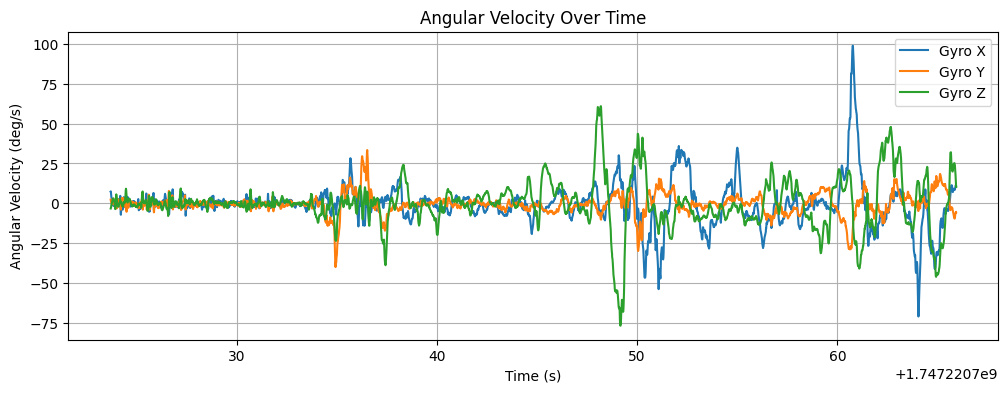

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(df_1['timestamp'], df_1['gyro x [deg/s]'], label='Gyro X')
plt.plot(df_1['timestamp'], df_1['gyro y [deg/s]'], label='Gyro Y')
plt.plot(df_1['timestamp'], df_1['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

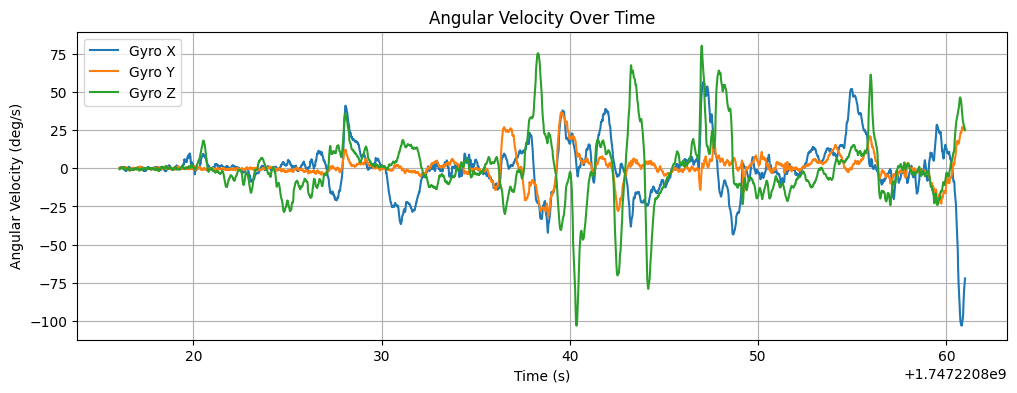

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(df_2['timestamp'], df_2['gyro x [deg/s]'], label='Gyro X')
plt.plot(df_2['timestamp'], df_2['gyro y [deg/s]'], label='Gyro Y')
plt.plot(df_2['timestamp'], df_2['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

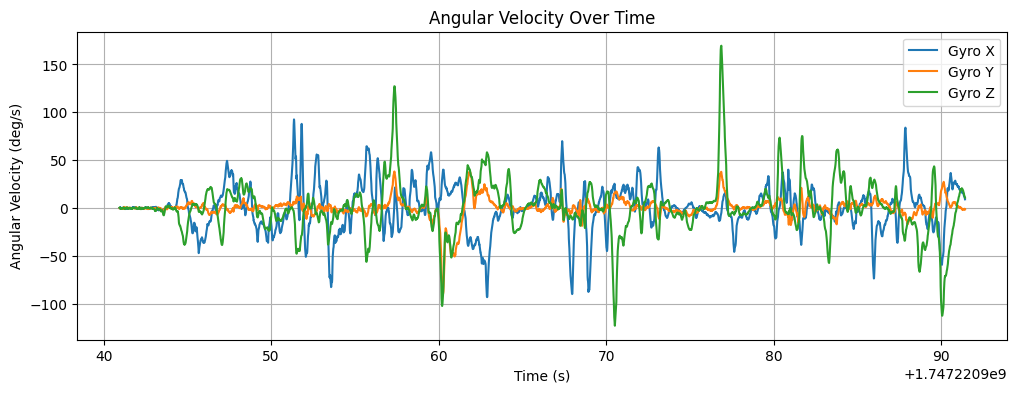

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(df_3['timestamp'], df_3['gyro x [deg/s]'], label='Gyro X')
plt.plot(df_3['timestamp'], df_3['gyro y [deg/s]'], label='Gyro Y')
plt.plot(df_3['timestamp'], df_3['gyro z [deg/s]'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

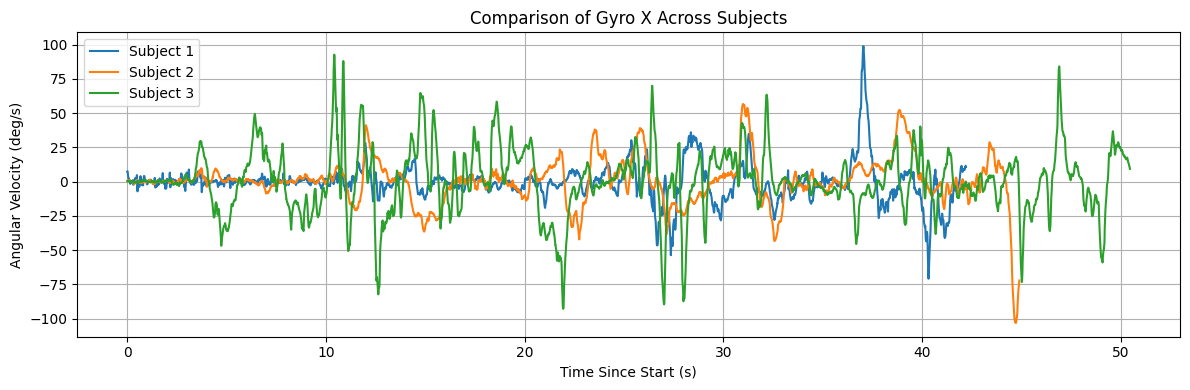

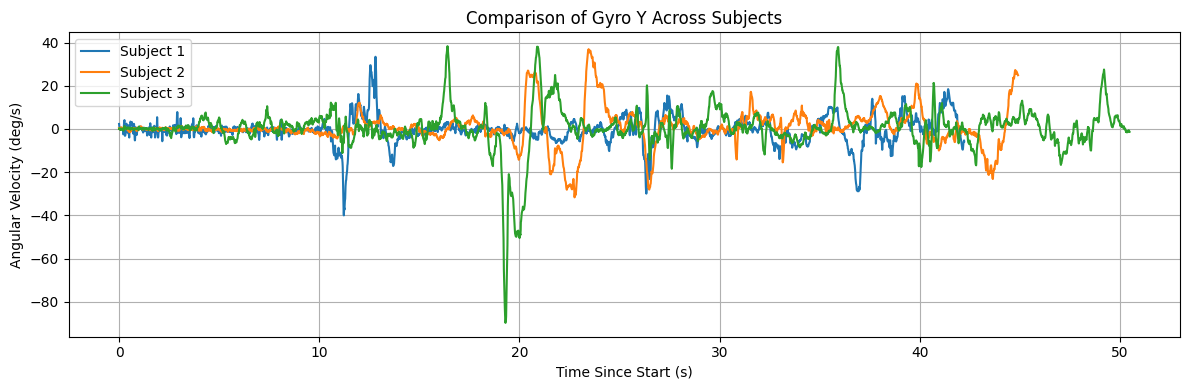

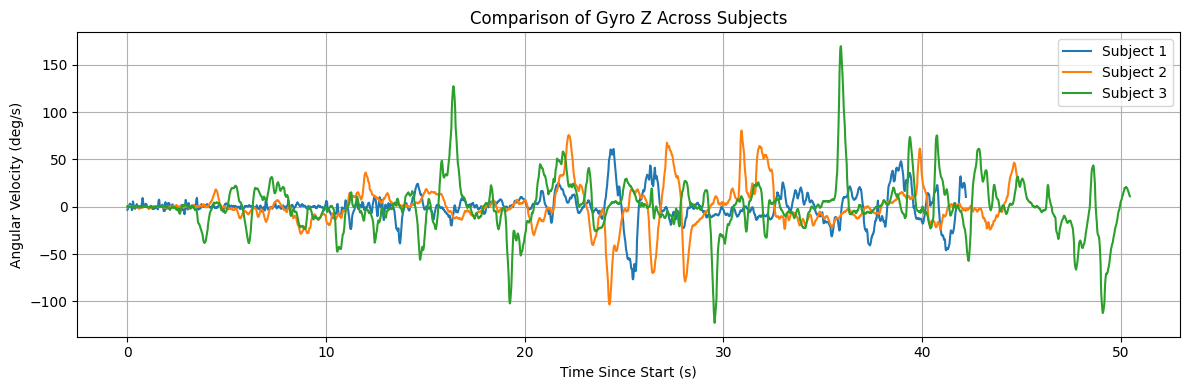

In [23]:
import matplotlib.pyplot as plt

# Optional: normalize time to start at 0 for each subject
normalize_time = True

# Make a copy so original data is unchanged
df_1c = df_1.copy()
df_2c = df_2.copy()
df_3c = df_3.copy()

if normalize_time:
    df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
    df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
    df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# Plotting function
def plot_gyro_axis(axis):
    plt.figure(figsize=(12, 4))
    
    plt.plot(df_1c['timestamp'], df_1c[f'gyro {axis} [deg/s]'], label='Subject 1')
    plt.plot(df_2c['timestamp'], df_2c[f'gyro {axis} [deg/s]'], label='Subject 2')
    plt.plot(df_3c['timestamp'], df_3c[f'gyro {axis} [deg/s]'], label='Subject 3')
    
    plt.title(f'Comparison of Gyro {axis.upper()} Across Subjects')
    plt.xlabel('Time (s)' if not normalize_time else 'Time Since Start (s)')
    plt.ylabel('Angular Velocity (deg/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each axis comparison
plot_gyro_axis('x')
plot_gyro_axis('y')
plot_gyro_axis('z')


In [26]:
#Angular speed 1
df_1['angular_speed'] = np.sqrt(df_1['gyro x [deg/s]']**2 +
                               df_1['gyro y [deg/s]']**2 +
                               df_1['gyro z [deg/s]']**2)

#Angular speed 2
df_2['angular_speed'] = np.sqrt(df_2['gyro x [deg/s]']**2 +
                               df_2['gyro y [deg/s]']**2 +
                               df_2['gyro z [deg/s]']**2)

#Angular speed 3
df_3['angular_speed'] = np.sqrt(df_3['gyro x [deg/s]']**2 +
                               df_3['gyro y [deg/s]']**2 +
                               df_3['gyro z [deg/s]']**2)

### Head movement

In [27]:
peaks1, _ = signal.find_peaks(df_1['angular_speed'], height=50)
peaks2, _ = signal.find_peaks(df_2['angular_speed'], height=50)
peaks3, _ = signal.find_peaks(df_3['angular_speed'], height=50)

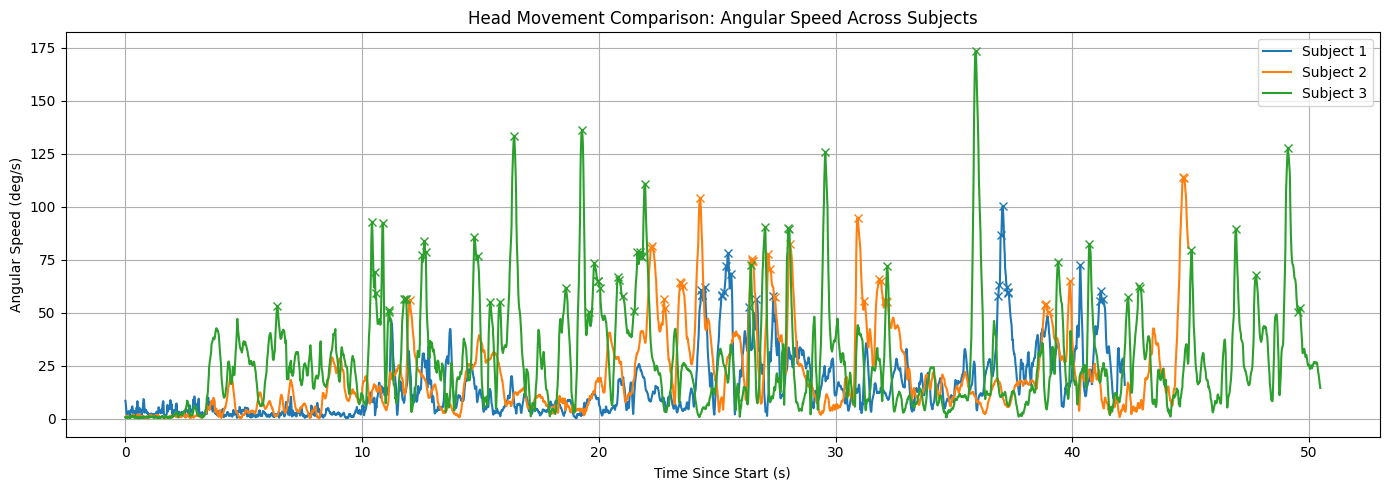

In [28]:

df_1c = df_1.copy()
df_2c = df_2.copy()
df_3c = df_3.copy()

df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# Plot all three in one figure
plt.figure(figsize=(14, 5))

# Subject 1
plt.plot(df_1c['timestamp'], df_1c['angular_speed'], label='Subject 1', color='C0')
plt.plot(df_1c['timestamp'].iloc[peaks1], df_1c['angular_speed'].iloc[peaks1], 'x', color='C0')

# Subject 2
plt.plot(df_2c['timestamp'], df_2c['angular_speed'], label='Subject 2', color='C1')
plt.plot(df_2c['timestamp'].iloc[peaks2], df_2c['angular_speed'].iloc[peaks2], 'x', color='C1')

# Subject 3
plt.plot(df_3c['timestamp'], df_3c['angular_speed'], label='Subject 3', color='C2')
plt.plot(df_3c['timestamp'].iloc[peaks3], df_3c['angular_speed'].iloc[peaks3], 'x', color='C2')

# Formatting
plt.title("Head Movement Comparison: Angular Speed Across Subjects")
plt.xlabel("Time Since Start (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Head orientation

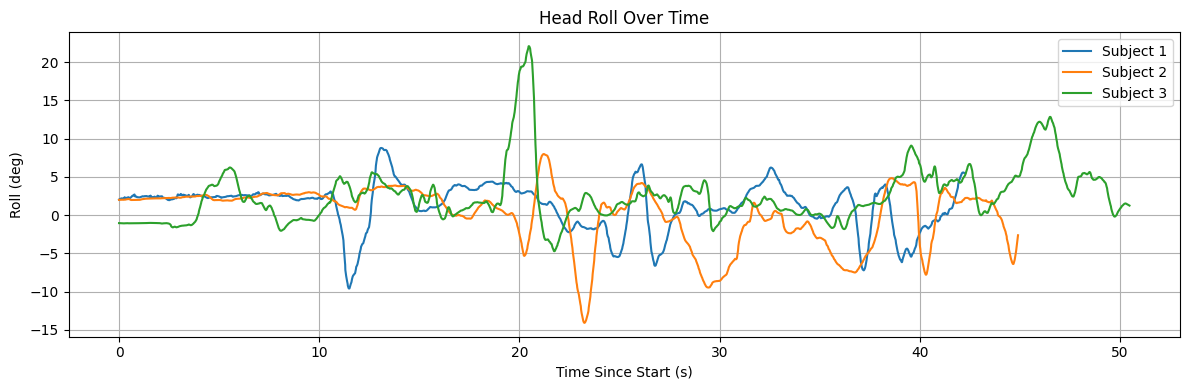

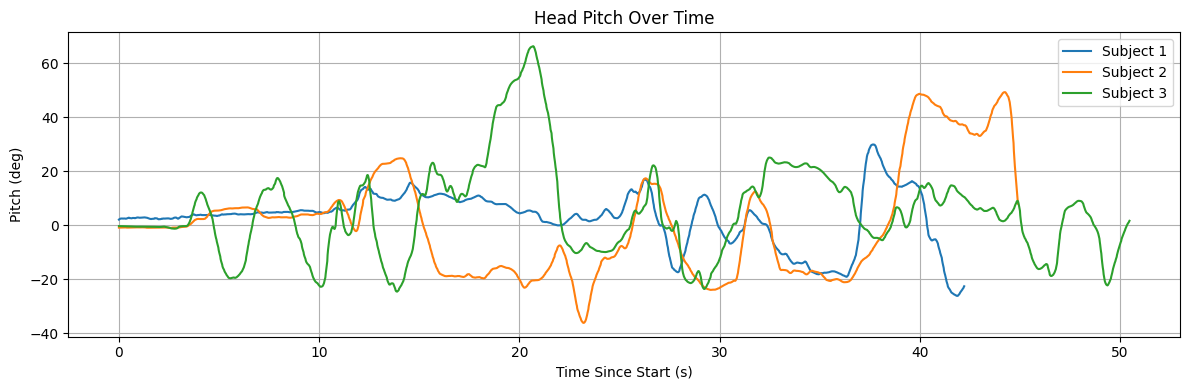

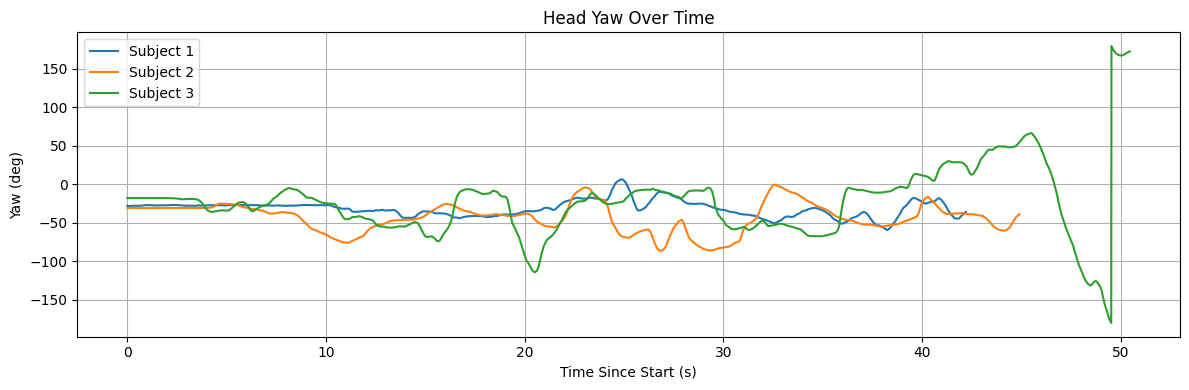

In [29]:


# Make copies and normalize time to start at 0
df_1c = df_1.copy()
df_2c = df_2.copy()
df_3c = df_3.copy()

df_1c['timestamp'] -= df_1c['timestamp'].iloc[0]
df_2c['timestamp'] -= df_2c['timestamp'].iloc[0]
df_3c['timestamp'] -= df_3c['timestamp'].iloc[0]

# General plotting function for orientation angles
def plot_orientation(angle):
    plt.figure(figsize=(12, 4))

    plt.plot(df_1c['timestamp'], df_1c[f'{angle} [deg]'], label='Subject 1', color='C0')
    plt.plot(df_2c['timestamp'], df_2c[f'{angle} [deg]'], label='Subject 2', color='C1')
    plt.plot(df_3c['timestamp'], df_3c[f'{angle} [deg]'], label='Subject 3', color='C2')

    plt.title(f'Head {angle.capitalize()} Over Time')
    plt.xlabel('Time Since Start (s)')
    plt.ylabel(f'{angle.capitalize()} (deg)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate plots for roll, pitch, yaw
plot_orientation('roll')
plot_orientation('pitch')
plot_orientation('yaw')


### Angular speed

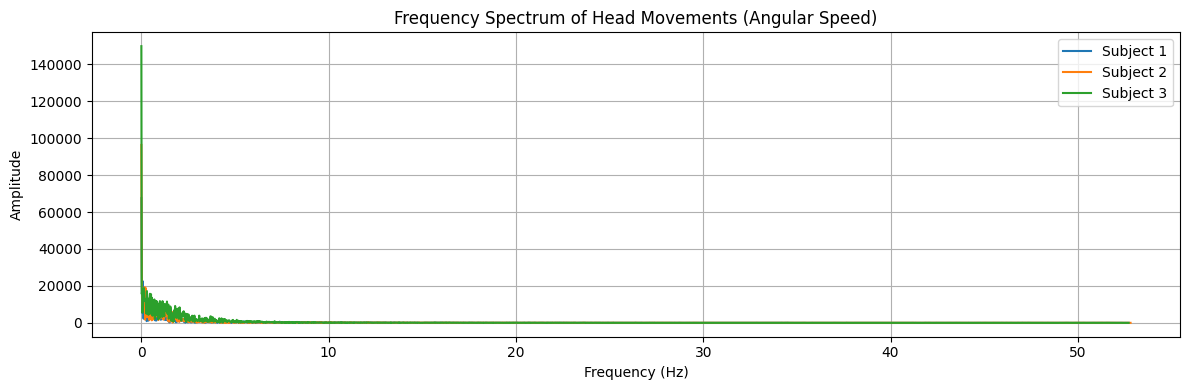

In [31]:

def compute_fft(df):
    n = len(df)
    dt = np.mean(np.diff(df['timestamp']))  # mean sampling interval (s)
    freq = np.fft.fftfreq(n, d=dt)
    spectrum = np.abs(np.fft.fft(df['angular_speed']))
    return freq[:n//2], spectrum[:n//2]  # return only positive frequencies

# Compute FFTs
freq1, spec1 = compute_fft(df_1)
freq2, spec2 = compute_fft(df_2)
freq3, spec3 = compute_fft(df_3)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(freq1, spec1, label='Subject 1', color='C0')
plt.plot(freq2, spec2, label='Subject 2', color='C1')
plt.plot(freq3, spec3, label='Subject 3', color='C2')

plt.title("Frequency Spectrum of Head Movements (Angular Speed)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
